In [2]:
import os
from PIL import Image #to operate on pics or images
from IPython.display import display #Only for Jupyter Notebook
import matplotlib.pyplot as plt
import numpy as np
import json

import warnings
warnings.filterwarnings('ignore')

## Show Images

### A random Image

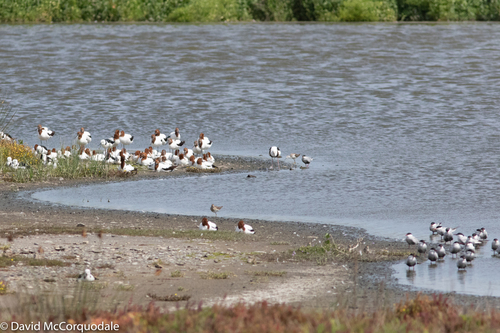

In [9]:
base_path = "D:\\data\\cvpr_birds\\test\\test"
rand_img = str(np.random.randint(0,10))
img = os.path.join(base_path,rand_img+".jpg")
with Image.open(img) as im:
    display (im)

In [11]:
NUM_IMGS_PER_COL = 5
NUM_COLS = 3
def show_grid(base_path):
    f,ax = plt.subplots(NUM_COLS,NUM_IMGS_PER_COL, figsize=(20, 9),)
    for i in range(NUM_IMGS_PER_COL):
        for j in range(NUM_COLS):
            rand_img = np.random.randint(0,5000)
            im_path = os.path.join(base_path,str(rand_img)+".jpg")
            with Image.open(im_path) as im:
                ax[j, i].imshow(im)
                
def show_grid_train(base_path):
    f,ax = plt.subplots(NUM_COLS,NUM_IMGS_PER_COL, figsize=(20,9),)
    for i in range(NUM_IMGS_PER_COL):
        for j in range(NUM_COLS):
            
            rand_class = np.random.randint(0,199)
            all_imgs = os.listdir(os.path.join(base_path,str(rand_class)))
            rand_img = np.random.randint(0,len(all_imgs))
            im_path = os.path.join(base_path,str(rand_class),str(rand_img)+".jpg")
            with Image.open(im_path) as im:
                ax[j, i].imshow(im)      

def count_files(folder):
    num = len(os.listdir(folder))
    return num

### Random Images from Each Part of Data

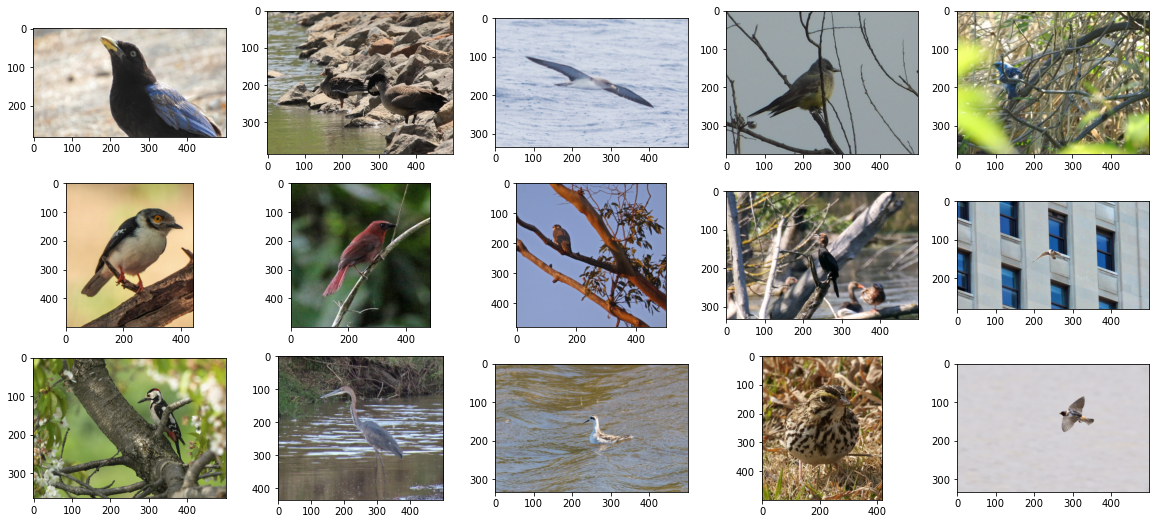

In [10]:
train_path = "D:\\data\\cvpr_birds\\trainval_images\\trainval_images"
show_grid_train(train_path)

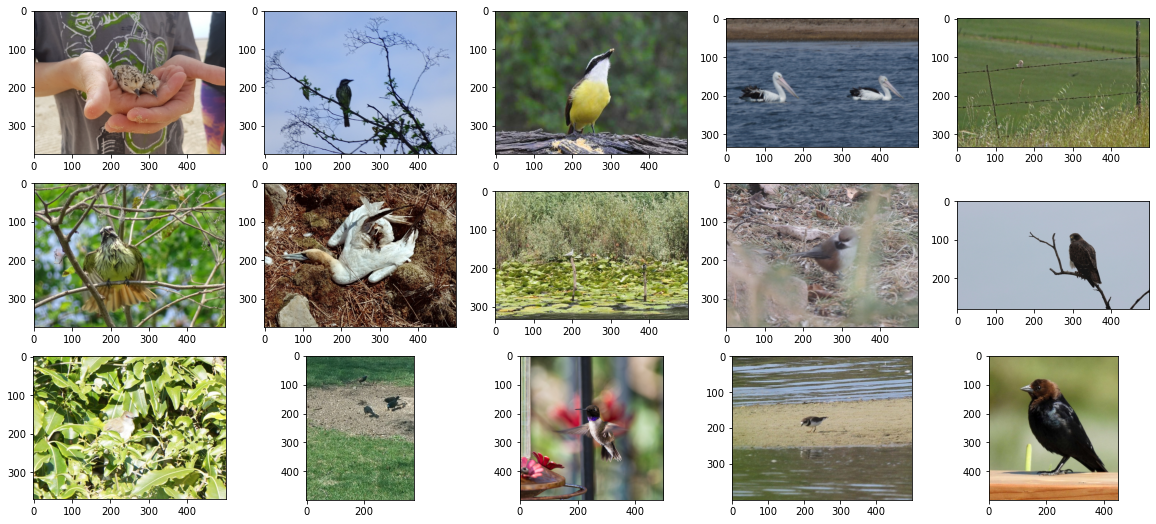

In [80]:
test_path = "D:\\data\\test\\test"
show_grid(test_path)

total num of images for in-distribution data: 26640


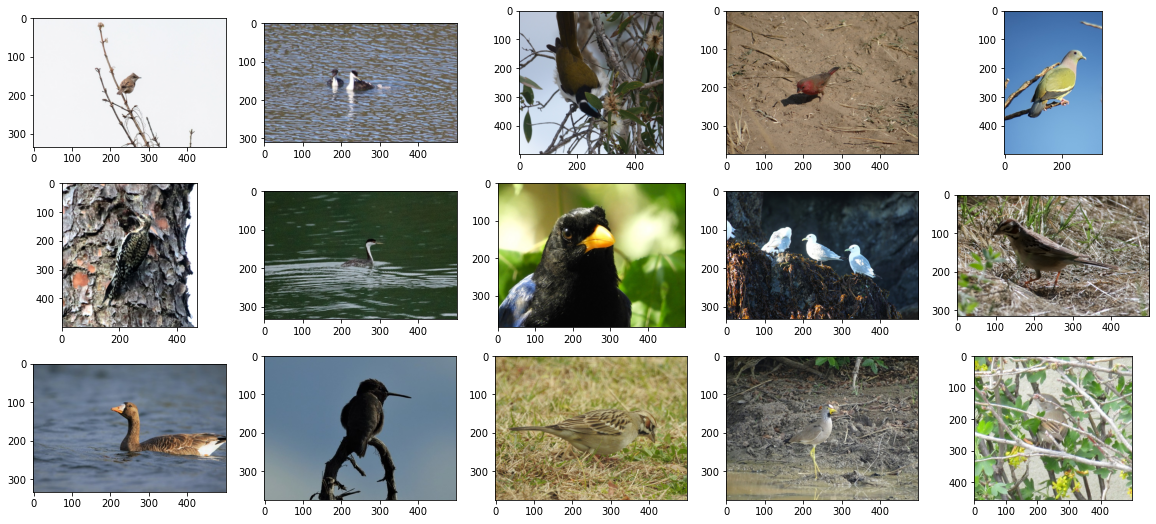

In [17]:
in_path = "D:\\data\\cvpr_birds\\u_train_in\\u_train_in"
print("total num of images for in-distribution data:", count_files(in_path))
show_grid(in_path)

total num of images for out of-distribution data: 122208


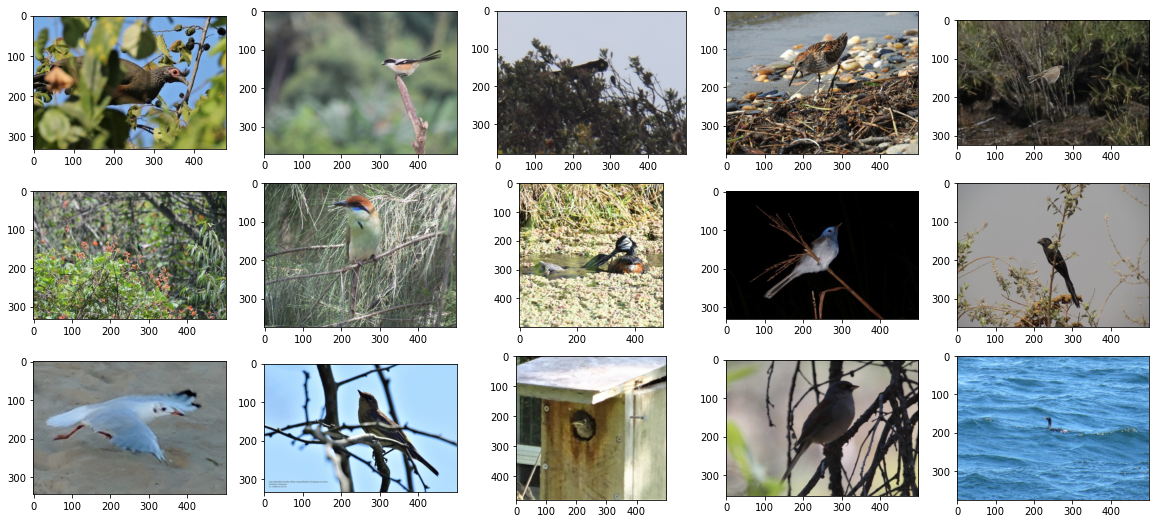

In [20]:
out_path = "D:\\data\\cvpr_birds\\u_train_out\\u_train_out"
print("total num of images for out of-distribution data:", count_files(out_path))
show_grid(out_path)

## Class Distribution 

In [15]:
import json 
import pandas as pd
import numpy as np


base_path = "D:\\data\\cvpr_birds\\annotation\\annotation"
annots = { 
    "train": "anno_l_train.json",
    "validation": "anno_val.json",
    "test": "anno_test.json"
               }

# load train annotation file
with open(base_path+"\\"+annots["train"], "r", encoding="ISO-8859-1") as file:
    train_annotations = json.load(file)
# get image details 
train_imgs = pd.DataFrame(train_annotations['images'])
# get image cateogry and other relevant details
train_anns = pd.DataFrame(train_annotations['annotations']).drop(columns='image_id')
# merge file detail and its category
train_df = train_imgs.merge(train_anns, on='id')    

# load validation annotation file
with open(base_path+"\\"+annots["validation"], "r", encoding="ISO-8859-1") as file:
    val_annotations = json.load(file)
val_imgs = pd.DataFrame(val_annotations['images'])
val_anns = pd.DataFrame(val_annotations['annotations']).drop(columns='image_id')
val_df = val_imgs.merge(val_anns, on='id')    
 
# combine train and val
frames = [train_df, val_df]
trainval_df = pd.concat(frames)
        

In [ ]:
def plot_class_dist(df,title, save_img=None):
    count = df['category_id'].value_counts().to_dict()
    cat = []
    nums= []
    for i,j in count.items():
        cat.append(i)
        nums.append(j)
    from matplotlib import pyplot as plt    
    plt.plot(nums, label=title)
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    if save_img is not None:
        plt.savefig("imgs/"+save_img)

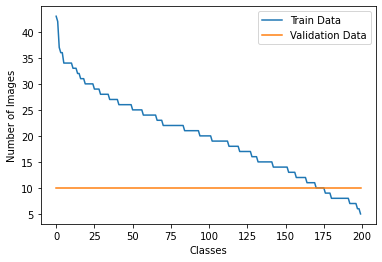

In [17]:
plot_class_dist(train_df, title="Train Data")
plot_class_dist(val_df, title="Validation Data")
plt.legend()
plt.savefig("imgs/class_dist")


# Analysis

In [5]:
import pandas as pd
import numpy as np
path = "D:\\PhD\\Code\\Semi-Supervised-CVPR\\results\\noisy_labels\\inceptionresnetv2_rbn_bs32_indist_soft_en10.csv"
indist_soft_temp = pd.read_csv(path)



In [29]:
nums = indist_soft_temp.shape[0]

cls = []
all_preds = []
vars = []
cls_selected = []
all_preds_selected = []
vars_selected = []

max1 = []
max1_selected = []
threshold = 0.01294512

for j in  range(nums):
    vals = indist_soft_temp.values[j][1].replace("[", "").replace("]","").replace("\n", "").split(" ")
    preds = [float(vals[i]) for i in range(len(vals)) if vals[i]!=""]
    preds = np.array(preds)
    vars.append(preds.var())
    max1.append(np.max(preds))
    cls.append(np.argmax(preds))
    
    if np.max(preds)>threshold:
        list1 = [df_a.values[j][0]]
        vars_selected.append(preds.var())
        max1_selected.append(np.max(preds))
        cls_selected.append(np.argmax(preds))
        for pred in preds:
            list1.append(pred)
        all_preds.append(list1)


In [30]:
indist_df = pd.DataFrame(all_preds)
indist_df.to_csv("results/noisy_labels/indist_soft_label.csv")

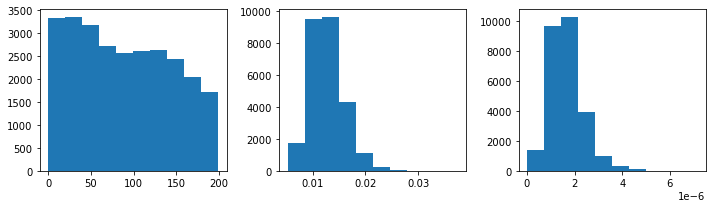

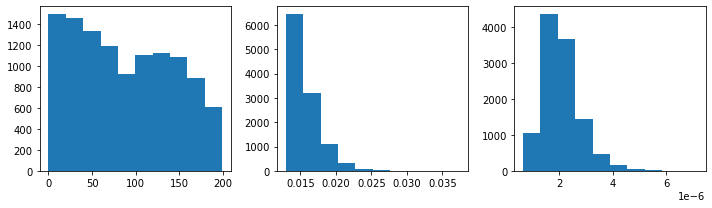

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.hist(cls)
plt.subplot(1,3,2)
plt.hist(max1)
plt.subplot(1,3,3)
plt.hist(vars)
plt.tight_layout()

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.hist(cls_selected)
plt.subplot(1,3,2)
plt.hist(max1_selected)
plt.subplot(1,3,3)
plt.hist(vars_selected)
plt.tight_layout()

In [32]:
data_df= pd.read_csv("results/noisy_labels/indist_soft_label.csv")
data_df.head()

Unnamed: 0                  0         1         2         3         4  \
0           0   u_train_in/1.jpg  0.003787  0.004245  0.003533  0.005250   
1           1   u_train_in/4.jpg  0.004174  0.004467  0.004421  0.005252   
2           2   u_train_in/5.jpg  0.003820  0.005494  0.005345  0.005009   
3           3   u_train_in/9.jpg  0.008920  0.005303  0.005213  0.003508   
4           4  u_train_in/11.jpg  0.004832  0.005429  0.004979  0.005109   

          5         6         7         8  ...       191       192       193  \
0  0.004283  0.004465  0.004339  0.004095  ...  0.004580  0.006044  0.002977   
1  0.004412  0.004441  0.006924  0.005136  ...  0.004149  0.005529  0.004893   
2  0.006545  0.003692  0.004540  0.005256  ...  0.006157  0.005090  0.007653   
3  0.005468  0.005272  0.007872  0.005079  ...  0.004061  0.003969  0.004574   
4  0.005306  0.004359  0.004628  0.007399  ...  0.005595  0.004301  0.005130   

        194       195       196       197       198       199       200  
0  0.004677  0.006146  0.004616  0.003599  0.004543  0.006709  0.007277  
1  0.005256  0.004959  0.005478  0.003624  0.005703  0.005120  0.005742  
2  0.004654  0.003753  0.005914  0.004402  0.004792  0.004192  0.004227  
3  0.003870  0.003510  0.004045  0.003260  0.004065  0.003369  0.004078  
4  0.003847  0.004204  0.003998  0.004896  0.006347  0.005465  0.005792  

[5 rows x 202 columns]

In [43]:
data_df.iloc[0].values[2:].shape

(200,)

In [50]:
data_df.iloc[1].values[2:].astype("float")

array([0.00417392, 0.00446713, 0.00442102, 0.00525168, 0.00441218,
       0.00444051, 0.00692421, 0.00513611, 0.00498258, 0.0035213 ,
       0.0057555 , 0.00431036, 0.00505852, 0.00412876, 0.00546989,
       0.00353836, 0.00449616, 0.0043963 , 0.00524752, 0.00369117,
       0.00606801, 0.00599528, 0.00399928, 0.00426631, 0.00383472,
       0.00538665, 0.00770265, 0.00688769, 0.00609179, 0.00523966,
       0.00416884, 0.00450017, 0.00470865, 0.0043012 , 0.00576956,
       0.0040641 , 0.00585593, 0.00440944, 0.00399871, 0.00591016,
       0.00582931, 0.00502962, 0.00361136, 0.00610324, 0.00573193,
       0.0039374 , 0.00508275, 0.00522446, 0.00707508, 0.00897779,
       0.00435264, 0.00455724, 0.0057346 , 0.00772425, 0.00814694,
       0.00422054, 0.00359611, 0.00514108, 0.00470191, 0.00564731,
       0.00443867, 0.00497587, 0.00446787, 0.00518276, 0.00451328,
       0.00378479, 0.00514753, 0.00352923, 0.01753045, 0.00498834,
       0.00421986, 0.00567235, 0.00381533, 0.00540423, 0.00507

26640
0.01294512


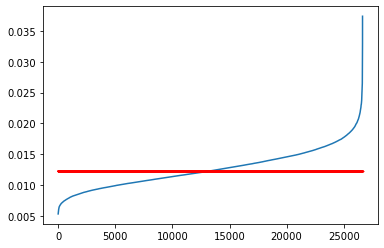

In [181]:
vars = max1
print(len(vars))
len_vars = len(vars)
a = np.array(vars)
m =np.median(a)
a = np.sort(a)
index_mid = int(58*(len_vars/100))
cutoff_vals = a[index_mid]
print(cutoff_vals)
from matplotlib import pyplot as plt
plt.plot(a)
plt.plot(range(len_vars), [m]*len_vars, marker='o', markersize=0.5, color="red")


In [88]:
import numpy as np
preds = np.array(preds)
preds.var()

5.709921676868351e-05

In [39]:
data = pd.read_csv(path)

data = data.apply(pd.to_numeric)

ValueError: Unable to parse string "test/0.jpg" at position 0

In [47]:
data.loc[2,:]

file_name                                             test/2.jpg
category_id    [0.00097027 0.00075381 0.00473964 0.00185794 0...
Name: 2, dtype: object